In [1]:
library(dplyr)
library(stringr)
library(readr)
library(tidyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
# this is pulled from the BigQuery weights table
pfidat <- read_csv('../../Results/manuscript-studies-pfi-test-DWE-weights.csv.gz')

Parsed with column specification:
cols(
  Study = col_character(),
  EdgeID = col_double(),
  LCell = col_character(),
  Ligand = col_character(),
  Receptor = col_character(),
  RCell = col_character(),
  S1 = col_double(),
  med_diff = col_double(),
  AliquotBarcode = col_character(),
  PatientBarcode = col_character(),
  EdgeWt = col_double(),
  Stage = col_double(),
  PFI = col_double()
)



In [33]:
# this is pulled from the BigQuery weights table
stagedat <- read_csv('../../Results/manuscript-studies-stage-test-DWE-weights.csv.gz')

Parsed with column specification:
cols(
  Study = col_character(),
  EdgeID = col_double(),
  LCell = col_character(),
  Ligand = col_character(),
  Receptor = col_character(),
  RCell = col_character(),
  S1 = col_double(),
  med_diff = col_double(),
  AliquotBarcode = col_character(),
  PatientBarcode = col_character(),
  EdgeWt = col_double(),
  Stage = col_double()
)



In [31]:
head(pfidat)

Study,EdgeID,LCell,Ligand,Receptor,RCell,S1,med_diff,AliquotBarcode,PatientBarcode,EdgeWt,Stage,PFI
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
SKCM,930270,Preadipocytes,SFRP1,FZD6,Osteoblast,0.2743006,0.15400849,TCGA-DA-A960-01A-11R-A37K-07,TCGA-DA-A960,0.008969967,1,2
SKCM,925750,Preadipocytes,COL5A3,SDC3,Mast cells,0.2949511,0.17816280,TCGA-EB-A4OZ-01A-12R-A266-07,TCGA-EB-A4OZ,0.038965212,2,2
ESCA,586540,Megakaryocytes,IL1RN,IL1R2,Eosinophils,-0.1701334,-0.11258132,TCGA-L5-A4OT-01A-11R-A28J-31,TCGA-L5-A4OT,0.509381468,2,1
ESCA,590462,Megakaryocytes,IL1RN,IL1R2,Megakaryocytes,-0.1730363,-0.11928949,TCGA-L5-A8NR-01A-11R-A37I-31,TCGA-L5-A8NR,0.126264476,2,2
SKCM,925806,Preadipocytes,LRPAP1,SORT1,Mast cells,0.2733259,0.20182224,TCGA-FR-A3R1-01A-11R-A239-07,TCGA-FR-A3R1,0.280340579,1,2
COAD,585007,Megakaryocytes,BMP10,ACVRL1,Chondrocytes,0.1714947,0.09921214,TCGA-DM-A285-01A-11R-A16W-07,TCGA-DM-A285,0.186627847,2,1


In [34]:
head(stagedat)

Study,EdgeID,LCell,Ligand,Receptor,RCell,S1,med_diff,AliquotBarcode,PatientBarcode,EdgeWt,Stage
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
SKCM,530780,Macrophages M1,CLEC11A,KIT,GMP,-0.3103393,-0.18038028,TCGA-EB-A4OZ-01A-12R-A266-07,TCGA-EB-A4OZ,0.34837421,2
COAD,471113,Keratinocytes,EREG,ERBB2,Pericytes,-0.1446882,-0.06493097,TCGA-G4-6311-01A-11R-1723-07,TCGA-G4-6311,0.29720742,2
SKCM,682374,MSC,APOE,LRP8,GMP,-0.3505004,-0.22019895,TCGA-EB-A57M-01A-51R-A311-07,TCGA-EB-A57M,0.18386567,2
COAD,787465,NK cells,TNF,TNFRSF1B,Erythrocytes,0.1368224,0.05802008,TCGA-AA-3675-01A-02R-0905-07,TCGA-AA-3675,0.05212516,1
COAD,952730,Sebocytes,INHBA,ACVR1B,Chondrocytes,-0.1460105,-0.06259579,TCGA-A6-5662-01A-01R-1653-07,TCGA-A6-5662,0.13507601,2
COAD,277208,CLP,LTA,TNFRSF14,Th2 cells,0.1364032,0.06402661,TCGA-A6-6138-01A-11R-1774-07,TCGA-A6-6138,0.10042925,1


In [39]:
d1 <- pfidat %>% dplyr::filter(Study == 'STAD' & EdgeID == 597043) %>% na.omit()
g <- ggplot(data = d1, aes(x=factor(PFI), y=EdgeWt)) + geom_violin() + geom_boxplot(width=.1) + xlab('PFI')
ggsave(g, filename = 'stad_edge_597043_pfi_violin.png', dpi = 300)

Saving 6.67 x 6.67 in image



In [42]:
d2 <- pfidat %>% dplyr::filter(Study == 'COAD' & EdgeID == 962085) %>% na.omit()
g <- ggplot(data = d2, aes(x=factor(PFI), y=EdgeWt)) + geom_violin() + geom_boxplot(width=.1) + xlab('PFI')
ggsave(g, filename = 'coad_edge_962085_pfi_violin.png', dpi = 300)

Saving 6.67 x 6.67 in image



In [43]:
d3 <- pfidat %>% dplyr::filter(Study == 'ESCA' & EdgeID == 344989) %>% na.omit()
g <- ggplot(data = d3, aes(x=factor(PFI), y=EdgeWt)) + geom_violin() + geom_boxplot(width=.1) + xlab('PFI')
ggsave(g, filename = 'esca_edge_344989_pfi_violin.png', dpi = 300)

Saving 6.67 x 6.67 in image



In [45]:
d4 <- stagedat %>% dplyr::filter(Study == 'SKCM' & EdgeID == 397929) %>% na.omit()
g <- ggplot(data = d4, aes(x=factor(Stage), y=EdgeWt)) + geom_violin() + geom_boxplot(width=.1) + xlab('Stage')
ggsave(g, filename = 'skcm_edge_397929_stage_violin.png', dpi = 300)

Saving 6.67 x 6.67 in image



In [82]:
  # (LCell == 'Th2' | LCell == 'NK') &
d5 <- stagedat %>% dplyr::filter(Study == 'STAD' & (LCell %in% c('Th2 cells', 'NK cells'))  & Ligand %in% c('IL1A', 'IL1B', 'IL4', 'TNF')) %>% select(RCell) %>% table
d5


.
Skeletal muscle 
            778 

In [79]:
stagedat %>% dplyr::filter( (LCell %in% c('Th2 cells', 'NK cells')) & (RCell %in% c('Th2 cells', 'NK cells')) ) %>% select(Ligand, Receptor) %>% table
# & Ligand %in% c('IL1A', 'IL1B', 'IL4', 'TNF'))

         Receptor
Ligand    CD247 CD3D CD97 FAS ITGA6 KCNN4 KLRD1 LRP8 SCN10A SORL1 TNFRSF10B
  ADAM9       0    0    0   0   281     0     0    0      0     0         0
  B2M       281  562    0   0     0     0   281    0      0     0         0
  CALM1       0    0    0 281     0   281     0    0    281     0         0
  CD55        0    0  281   0     0     0     0    0      0     0         0
  FASLG       0    0    0 562     0     0     0    0      0     0         0
  LRPAP1      0    0    0   0     0     0     0  281      0   281         0
  TNFSF10     0    0    0   0     0     0     0    0      0     0       281

In [86]:
pfidat %>% dplyr::filter(Study == 'STAD' & Ligand %in% c('IL1A', 'IL1B', 'IL18', 'TNF') ) %>% select(EdgeID, LCell, Ligand, Receptor, RCell, S1, med_diff) %>% unique()


EdgeID,LCell,Ligand,Receptor,RCell,S1,med_diff
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
426271,HSC,IL1B,IL1R1,Megakaryocytes,0.1399667,0.06327210
773120,Neutrophils,IL1B,IL1R2,Megakaryocytes,0.1352791,0.07801638
105991,CD4+ T-cells,IL1B,IL1R2,Megakaryocytes,0.1344380,0.08061782


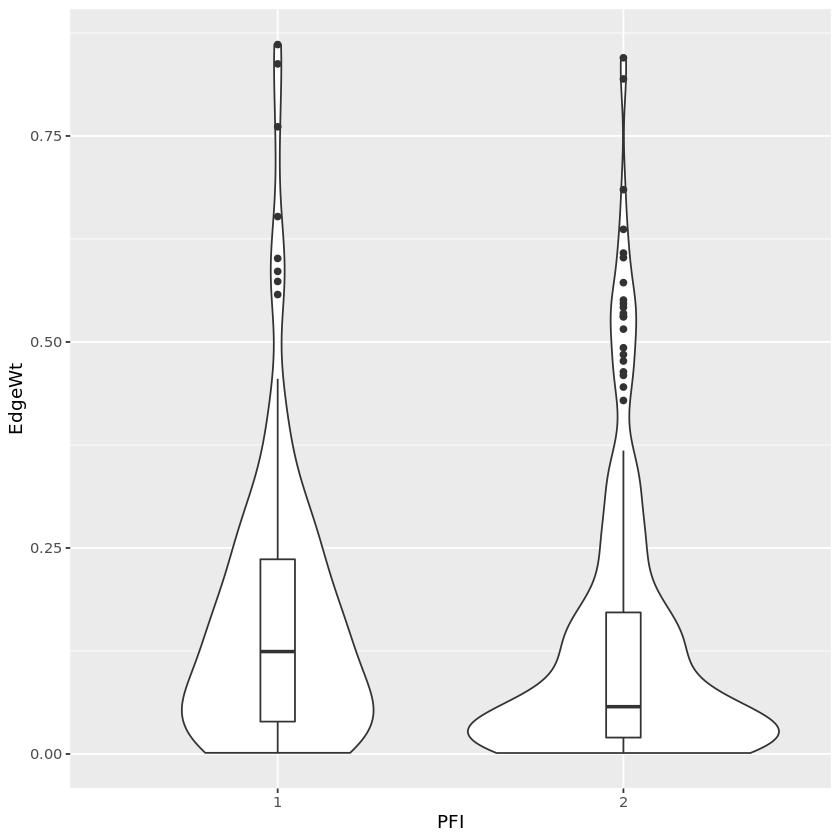

In [87]:
d1 <- pfidat %>% dplyr::filter(Study == 'STAD' & EdgeID == 426271) %>% na.omit()
g <- ggplot(data = d1, aes(x=factor(PFI), y=EdgeWt)) + geom_violin() + geom_boxplot(width=.1) + xlab('PFI')
#ggsave(g, filename = 'stad_edge_597043_pfi_violin.png', dpi = 300)
g

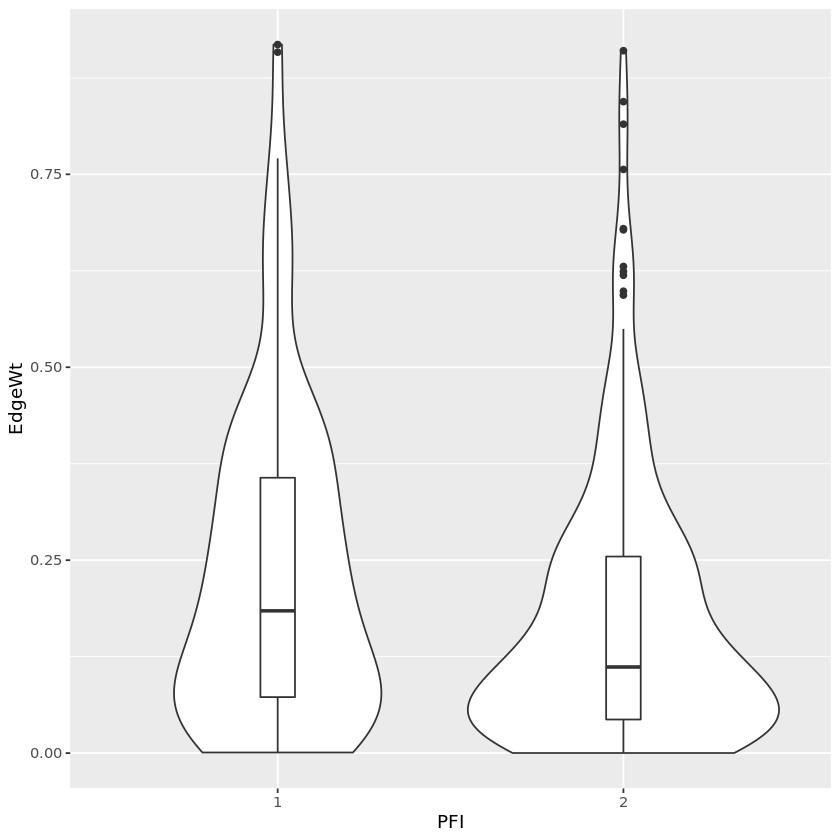

In [88]:
d1 <- pfidat %>% dplyr::filter(Study == 'STAD' & EdgeID == 773120) %>% na.omit()
g <- ggplot(data = d1, aes(x=factor(PFI), y=EdgeWt)) + geom_violin() + geom_boxplot(width=.1) + xlab('PFI')
#ggsave(g, filename = 'stad_edge_597043_pfi_violin.png', dpi = 300)
g

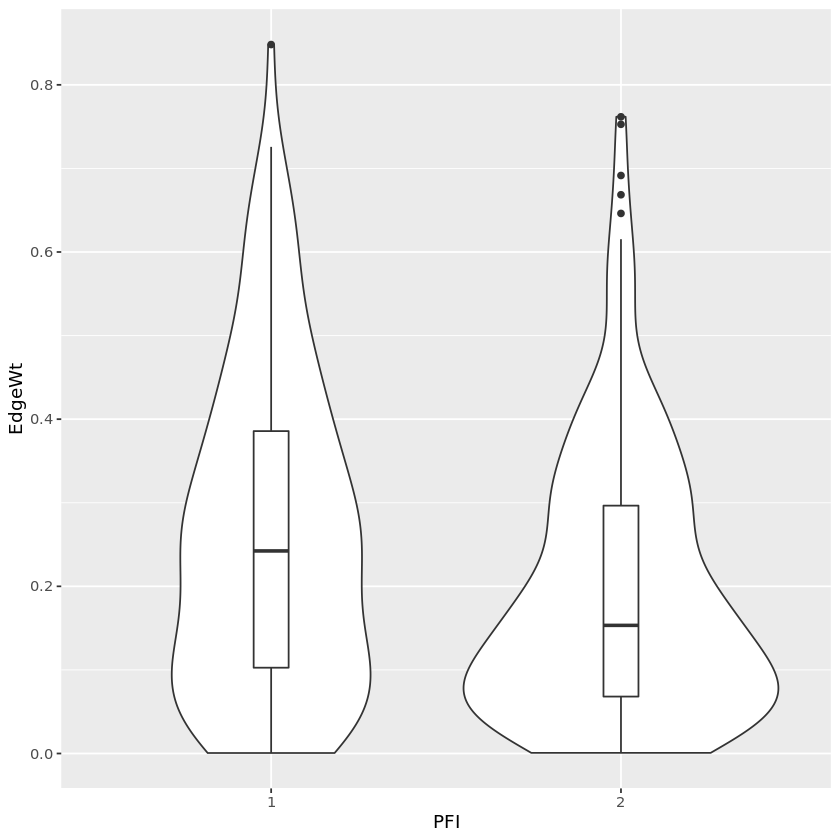

In [89]:
d1 <- pfidat %>% dplyr::filter(Study == 'STAD' & EdgeID == 105991) %>% na.omit()
g <- ggplot(data = d1, aes(x=factor(PFI), y=EdgeWt)) + geom_violin() + geom_boxplot(width=.1) + xlab('PFI')
#ggsave(g, filename = 'stad_edge_597043_pfi_violin.png', dpi = 300)
g